# Preliminary Analysis and Deliverable 2

**Introduction**

In this preliminary analysis, we are going to focus on the shape of data regarding the race difference.
We are going to examine the disparity between different race.

**Question to be answered:**

Has this disparity changed over time and, if so, in what way?

- Visualize the change in number of articles, conference proceedings, grants, and patents over time by gender and by race

**Initial Exploration**

1. Data visualization of all faculties we have in number of articles, conference proceedings, grants, and patents by race;
2. Data visualization of number of articles, conference proceedings, grants, and patents between departments.


**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Preliminary Analysis on Race

In [5]:
df = pd.read_csv("/Users/jennywong/Documents/Senior I 2021 Fall/CS506/final_proj/CS506_private/data_important/faculties_gender_race.csv")
print(df.shape)
df.head(2)

(749, 13)


,Id,Name,LastName,FirstName,Gender,RankName,Department,TotalArticleCount,TotalConfProcCount,TotalGrantCount,TotalPatentCount,TotalCourseCount,Race
0,1485,"BALAKRISHNAN, HAMSA",BALAKRISHNAN,HAMSA,Male,Professor,Aeronautics and Astronautics,46,63,15,1,2,PCTAPI
1,2030,"BARRETT, STEVEN R. H",BARRETT,STEVEN,Male,Associate,Aeronautics and Astronautics,87,7,11,1,2,PCTWHITE


In [6]:
race_type = df['Race'].unique()
race_type

array(['PCTAPI', 'PCTWHITE', 'PCTHISPANIC', 'PCTBLACK'], dtype=object)

In [8]:
df_overall = df.drop(columns=['Department']).drop_duplicates()
df_overall.shape

(692, 12)

In [7]:
x = df['Race'].value_counts()
x

PCTWHITE       624
PCTAPI         107
PCTHISPANIC     15
PCTBLACK         3
Name: Race, dtype: int64

In [30]:
x = df_overall['Race'].value_counts()
x

PCTWHITE       577
PCTAPI          97
PCTHISPANIC     15
PCTBLACK         3
Name: Race, dtype: int64

In [38]:
x.to_numpy()

array([577,  97,  15,   3])

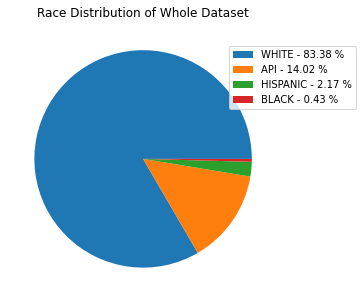

In [51]:
# a, b, c = plt.pie(x, labels=['WHITE', 'API', 'HISPANIC', 'BLACK'], autopct='%1.1f%%', textprops = {"fontsize":12})
plt.figure(figsize=(5, 5))

labels = ['WHITE', 'API', 'HISPANIC', 'BLACK']
plt.pie(x)
y = x.to_numpy()
porcent = 100.*y/y.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]
plt.legend(labels, loc='center right', bbox_to_anchor=(1.3, 0.8))
a = plt.title("Race Distribution of Whole Dataset")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of People in Race')

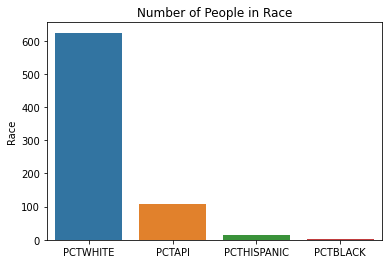

In [10]:
sns.barplot(x.index,x).set_title("Number of People in Race")

**Patent by Race**

In [53]:
df_Patent_count = df.groupby('Race')['TotalPatentCount'].sum()
df_Patent_count

Race
PCTAPI         1194
PCTBLACK         79
PCTHISPANIC      81
PCTWHITE       6751
Name: TotalPatentCount, dtype: int64

In [55]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], fontsize=12, ha = 'center',
                Bbox = dict(facecolor = 'white', alpha =.8))

Race
PCTAPI         1037
PCTBLACK         79
PCTHISPANIC      81
PCTWHITE       5612
Name: TotalPatentCount, dtype: int64


<ipython-input-55-17feecca167e>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], fontsize=12, ha = 'center',


Text(0.5, 0, 'Race')

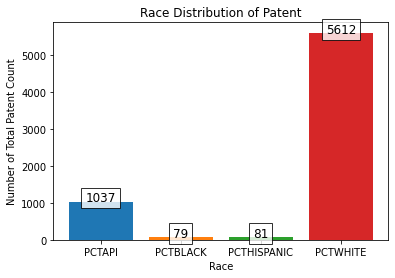

In [56]:
df_Patent_count = df_overall.groupby('Race')['TotalPatentCount'].sum()
print(df_Patent_count)
plt.bar(df_Patent_count.index,df_Patent_count, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
addlabels(df_Patent_count.index,df_Patent_count)
plt.title("Race Distribution of Patent")
plt.ylabel("Number of Total Patent Count")
plt.xlabel("Race")

**Article by Race**

In [14]:
df_Article_count = df.groupby('Race')['TotalArticleCount'].sum()
df_Article_count

Race
PCTAPI         15239
PCTBLACK         216
PCTHISPANIC     1484
PCTWHITE       74925
Name: TotalArticleCount, dtype: int64

Race
PCTAPI         13050
PCTBLACK         216
PCTHISPANIC     1484
PCTWHITE       67222
Name: TotalArticleCount, dtype: int64


<ipython-input-55-17feecca167e>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], fontsize=12, ha = 'center',


Text(0.5, 0, 'Race')

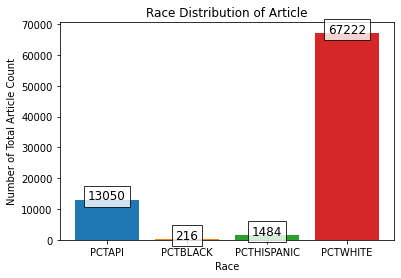

In [57]:
df_Article_count = df_overall.groupby('Race')['TotalArticleCount'].sum()
print(df_Article_count)
plt.bar(df_Article_count.index,df_Article_count, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
addlabels(df_Article_count.index,df_Article_count)
plt.title("Race Distribution of Article")
plt.ylabel("Number of Total Article Count")
plt.xlabel("Race")

**Conference Proceeding by Race**

In [16]:
df_Conf_count = df.groupby('Race')['TotalConfProcCount'].sum()
df_Conf_count

Race
PCTAPI          3605
PCTBLACK         432
PCTHISPANIC      557
PCTWHITE       15491
Name: TotalConfProcCount, dtype: int64

Race
PCTAPI          3406
PCTBLACK         432
PCTHISPANIC      557
PCTWHITE       14923
Name: TotalConfProcCount, dtype: int64


<ipython-input-55-17feecca167e>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], fontsize=12, ha = 'center',


Text(0.5, 0, 'Race')

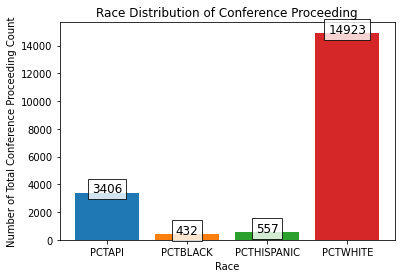

In [58]:
df_Conf_count = df_overall.groupby('Race')['TotalConfProcCount'].sum()
print(df_Conf_count)
plt.bar(df_Conf_count.index,df_Conf_count, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
addlabels(df_Conf_count.index,df_Conf_count)
plt.title("Race Distribution of Conference Proceeding")
plt.ylabel("Number of Total Conference Proceeding Count")
plt.xlabel("Race")

**Grant by Race**

In [18]:
df_Grant_count = df.groupby('Race')['TotalGrantCount'].sum()
df_Grant_count

Race
PCTAPI         1374
PCTBLACK         66
PCTHISPANIC     217
PCTWHITE       9121
Name: TotalGrantCount, dtype: int64

Race
PCTAPI         1199
PCTBLACK         66
PCTHISPANIC     217
PCTWHITE       8014
Name: TotalGrantCount, dtype: int64


<ipython-input-55-17feecca167e>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], fontsize=12, ha = 'center',


Text(0.5, 0, 'Race')

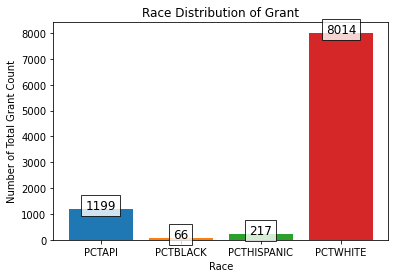

In [60]:
df_Grant_count = df_overall.groupby('Race')['TotalGrantCount'].sum()
print(df_Grant_count)
plt.bar(df_Grant_count.index,df_Grant_count, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
addlabels(df_Grant_count.index,df_Grant_count)
plt.title("Race Distribution of Grant")
plt.ylabel("Number of Total Grant Count")
plt.xlabel("Race")

**Preliminary Summary Data by Race**

In [21]:
z=df[['Department','Race','Gender']]
df_dp_count = pd.DataFrame(z.groupby(['Department','Race','Gender']).size())
df_dp_count

0
Department                   Race        Gender    
Aeronautics and Astronautics PCTAPI      Female   6
                                         Male     1
                             PCTHISPANIC Male     3
                             PCTWHITE    Female  14
                                         Male    27
...                                              ..
Physics                      PCTAPI      Male     3
                             PCTHISPANIC Female   1
                                         Male     1
                             PCTWHITE    Female  37
                                         Male    52

[64 rows x 1 columns]

### Disparity Over Time

In [22]:
df = pd.read_csv("/Users/jennywong/Documents/Senior I 2021 Fall/CS506/final_proj/CS506_private/data_important/gender_year.csv")
df.head(2)

,Name,Department_x,Year,ArticleCount,ConfProcCount,GrantCount,PatentCount,Id,Gender
0,"BALAKRISHNAN, HAMSA",Aeronautics and Astronautics,2004,2.0,5.0,0.0,0.0,1485,Male
1,"BALAKRISHNAN, HAMSA",Aeronautics and Astronautics,2005,0.0,1.0,0.0,0.0,1485,Male


In [33]:
dg=df.drop(columns=['Name','Department_x','ConfProcCount','ArticleCount','PatentCount','Id']).sort_values(by=['Year'])
dg = dg.iloc[1: -1, :]
dg = dg[dg.Year != 'No Issue']
dg = dg.iloc[: -1, :]
dg

,Year,GrantCount,Gender
20459,1900,0.0,Male
20957,1917,0.0,Female
553,1958,0.0,Female
19782,1959,0.0,Female
19783,1960,0.0,Female
...,...,...,...
13628,2021,0.0,Male
10738,2021,0.0,Female
10205,2021,0.0,Male
10739,2021,0.0,Female


In [45]:
dh=dg.groupby(["Year", "Gender"])["GrantCount"].sum()
dk=dh.reset_index(name = 'GrantCount')
dp = dk[dk["GrantCount"] > 10]
dp.head(2)

,Year,Gender,GrantCount
19,1979,Male,28.0
39,1990,Male,17.0


In [51]:
dConf=df.drop(columns=['Name','Department_x','GrantCount','ArticleCount','PatentCount','Id'])
dconf=dConf.groupby(["Year", "Gender"])["ConfProcCount"].sum()
dc=dconf.reset_index(name = 'ConfProcCount')
dC=dc[dc["ConfProcCount"] > 0]
dC.head(2)

,Year,Gender,ConfProcCount
15,1976,Male,1.0
17,1977,Male,1.0


In [53]:
d_article=df.drop(columns=['Name','Department_x','ConfProcCount','GrantCount','PatentCount','Id'])
da=d_article.groupby(["Year", "Gender"])["ArticleCount"].sum().reset_index(name = 'ArticleCount')
dA=da[da["ArticleCount"] > 80]
dA.head(2)

,Year,Gender,ArticleCount
64,2001,Male,111.0
66,2002,Male,136.0


In [55]:
d_patent=df.drop(columns=['Name','Department_x','ConfProcCount','GrantCount','ArticleCount','Id'])
dP=d_patent.groupby(["Year", "Gender"])["PatentCount"].sum().reset_index(name = 'PatentCount')
dpa=dP[dP["PatentCount"] > 30]
dpa.head(2)

,Year,Gender,PatentCount
26,1983,Male,57.0
28,1984,Male,32.0
